# Project: Investigate a Dataset: US census data on guns

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [230]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Opening Files 

In [231]:
#opening csv files 
df_census = pd.read_csv('U.S. Census Data.csv')
xl_ncis = pd.read_excel('gun_data.xlsx')

In [232]:
#converting the excel file to csv
xl_ncis.to_csv('gun_data.csv', encoding = 'utf-8', index= False)

#creating a new dataframe for the gun data
df_ncis = pd.read_csv('gun_data.csv')

### Quick snapshots of the dataframes 

In [233]:
#View the first 5 rows of the census file
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [234]:
df_ncis.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


> We notice several issues with these dataframes, particularly the census data, which seems to have null values, ill-formatted strings and column names as well as numeric data with commas. Lets take a closer look. 

> Another important detail we see is that the census data and the gun data are linked by the different states. To make the exploratory data analysis process easier, we could try flipping the rows and columns of the census data and group by state. 

### Cleaness Checks 
#### Census data 

In [235]:
#check for missing values 
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

> We notice that there are a lot of missing values in this dataset. Firstly, the column 'Fact Note' has 57 missing values. Instead of dropping these rows, we can replace all the null values in this column by the string 'None'. All the other columns have 20 null values. This could mean that all the null values occur on the same 20 rows, and that these rows should be dropped from the table. 

In [236]:
#Check for duplicate rows
sum(df_census.duplicated())

3

> There are 3 duplicate rows in this dataframe. We will drop these rows in the data cleaning part.

In [237]:
#Check the datatypes
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


#### NCIS gun data

In [238]:
df_ncis.shape

(12485, 27)

In [239]:
df_ncis.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

>This dataset contains large amounts of missing data. By closer inspection, we see that we could replace these null values by zeros because the columns which have missing data are quantititave. For example, the abscence of a value in a cell could mean that no one from Arizona returned a handgun in June 2017. 

In [240]:
sum(df_ncis.duplicated()) 

0

In [241]:
df_ncis.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

>Unlike the gun census data, all the numeric data is of the correct datatype! 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
#### Census Data 

In [242]:
#Reformat state names to all lowercase and replace spaces with underscores. 
df_census.rename(columns = lambda x: x.lower().replace(' ','_'), inplace=True)

#Create a list of state names, remove first 2 elements in the list. 
states = df_census.columns[2:]

In [243]:
#Fill missing values in 'fact_note' column with the string 'none'
df_census['fact_note'].fillna('none', inplace= True )

In [244]:
#Drop rows with missing values 
df_census.dropna(axis=0, inplace=True  )

In [245]:
#Drop duplicated rows
df_census.drop_duplicates(inplace=True, ignore_index=True )

In [246]:
#flip axis
df_census = df_census.transpose()

In [247]:
#Change the headers and add a new column containing the states. 
headers = df_census.iloc[0]
newcensus_df  = pd.DataFrame(df_census.values[2:], columns=headers)
newcensus_df['state'] = states


In [248]:
#Correctly reformat the new column names
newcensus_df.rename(columns = lambda x: x.lower().replace(' ','_').replace(',', '_'), inplace=True)

In [249]:
#Set state column to index 
newcensus_df.set_index('state', inplace =True)

In [250]:
newcensus_df.head()

fact,population_estimates__july_1__2016___(v2016),population_estimates_base__april_1__2010___(v2016),population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016),population__census__april_1__2010,persons_under_5_years__percent__july_1__2016___(v2016),persons_under_5_years__percent__april_1__2010,persons_under_18_years__percent__july_1__2016___(v2016),persons_under_18_years__percent__april_1__2010,persons_65_years_and_over__percent___july_1__2016___(v2016),persons_65_years_and_over__percent__april_1__2010,...,all_firms__2012,men-owned_firms__2012,women-owned_firms__2012,minority-owned_firms__2012,nonminority-owned_firms__2012,veteran-owned_firms__2012,nonveteran-owned_firms__2012,population_per_square_mile__2010,land_area_in_square_miles__2010,fips_code
state,,,,,,,,,,,,,,,,,,,,,
alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
california,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


>Now this dataset is cleaner and easier to interpret in parallel with the gun data file. We still notice one major problem: the numeric values in the cells are badly organised: for example, there are letters to indicate missing values, percentage signs, dollar signs.. 
Fixing all these issues now would be a waste of time because answer our questions we will have to focus on the census data for a handful of states. We can re-clean this dataframe once we have selected the rows we want to work with. 

#### Gun Data 

In [251]:
#replace null values with zeros 
df_ncis.fillna(0, inplace=True)

>This is pretty much all we had to do for this dataframe. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which states have had the highest growth in gun registrations?

In [252]:
#Create a new column 'year'
dates = [c.split('-') for c in df_ncis['month']]
years= [i[0] for i in dates]
df_ncis['year'] = years 
df_ncis.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year'],
      dtype='object')

In [253]:
#Group by state and year and get the average totals 
new_df = df_ncis[['state', 'year', 'totals']].groupby(['state', 'year'], as_index=False).mean()

> We are interested in the countries which have had the highest growth in gun registrations. We could just take the difference in totals:

$$ \Delta  = tot_{2017_i} - tot_{1998_i} $$ 

where $i$ represents the ith state. However, since we don't know shape of the curves for each state, we could compute the following value:

$$ \frac{\Delta}{\Delta t}  =\frac{tot_{2017_i} - tot_{1998_i}}{2017-1998} $$

Which will give us a fairly good approximation of the gradients. 

In [254]:
new_df.head()

,state,year,totals
0,Alabama,1998,18284.000000
1,Alabama,1999,20563.000000
2,Alabama,2000,18492.583333
3,Alabama,2001,19182.250000
4,Alabama,2002,18417.333333


In [255]:
#We want to get extract the rows where year = 1998 and 2017 for each state
df_98 = new_df.query('year == "1998"')
df_17 = new_df.query('year == "2017"')

In [256]:
#Reset indexes to avoid mismatch error
df_98.reset_index(drop=True,inplace=True)
df_17.reset_index(drop=True,inplace=True)

In [257]:
diff_totals_quotient = (df_17['totals']-df_98['totals'])/19

In [258]:
#Create a list of all US states and territories from https://www.loc.gov/law/help/guide/states.php
states_territories = pd.Series(['Alabama', 'Alaska', 'American Samoa', 'Arizona, Arkansas',
'California', 'Colorado', 'Connecticut',
'Delaware', 'District of Columbia',
'Florida',
'Georgia', 'Guam',
'Hawaii',
'Idaho', 'Illinois', 'Indiana', 'Iowa',
'Kansas', 'Kentucky',
'Louisiana',
'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands',
'Ohio', 'Oklahoma', 'Oregon',
'Pennsylvania', 'Puerto Rico',
'Rhode Island',
'South Carolina', 'South Dakota',
'Tennessee', 'Texas',
'Utah',
'Vermont', 'Virgin Islands', 'Virginia',
'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [259]:
#Create a new dataframe with states and territories and quotient difference. 
df_final = pd.concat([states_territories, diff_totals_quotient], axis=1)


In [260]:
df_final.sort_values('totals', ascending = False, inplace=True )
df_final.head()

,0,totals
18,Kentucky,19149.505848
14,Illinois,5715.195906
4,California,5052.780702
9,Florida,4486.728070
46,Texas,4117.985380


> We see that the states which have experienced the highest growth in gun registrations from 1998 to 2017 are Kentucky, Illinois, Florida, California anf Texas. 

### Research Question 2: is there a correlation between race and high gun per capita? 

> We are first trying to find the states which have the highest gun per capita. Therefore, we will only focus on the year 2017 (which is the most recent data).

> The value for the gun per capita for the $i$th state will be: $$G_i = \frac{tot_{2017_i}}{N_i}$$ Where $N$ represents the population of the $i$th state. 

In [261]:
#extract population estimates column from the census data 
population = newcensus_df['population_estimates__july_1__2016___(v2016)']
population.reset_index(drop=True, inplace = True)

In [262]:
#We need to drop the rows of df_17 which correspond to other US territories, as we have no census data for them. 
df_17['state']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                    Guam
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21         Mariana Islands
22                Maryland
23           Massachusetts
24                Michigan
25               Minnesota
26             Mississippi
27                Missouri
28                 Montana
29                Nebraska
30                  Nevada
31           New Hampshire
32              New Jersey
33              New Mexico
34                New York
35          North Carolina
36            North Dakota
3

In [263]:
#Drop rows by index 
df_17.set_index('state', inplace= True)
df_17.drop(index =['Guam', 'Hawaii', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], inplace=True )

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [264]:
df_17.reset_index(inplace=True)

In [265]:
#Add the population column 
df_17['population'] = population 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [266]:
df_17.head()

,state,year,totals,population
0,Alabama,2017,37418.111111,"4,863,300"
1,Alaska,2017,6322.444444,"741,894"
2,Arizona,2017,31061.444444,"6,931,071"
3,Arkansas,2017,17966.000000,"2,988,248"
4,California,2017,129725.333333,"39,250,017"


In [267]:
df_17.dtypes

state          object
year           object
totals        float64
population     object
dtype: object

> We see that the cells the population column are not float objects, so we need to change the types to compute the gun per capita. 

In [268]:
numbers = [float(number.replace(',','')) for number in df_17['population']]
df_17['population'] = numbers

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [269]:
#Create the gun per capita column and sort in ascending order
df_17['guns_per_1000'] = df_17['totals']/df_17['population'] * 1000
df_17.sort_values('guns_per_1000',ascending=False, inplace=True)
df_17.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,year,totals,population,guns_per_1000
16,Kentucky,2017,379775.111111,4436974.0,85.593269
10,Georgia,2017,42102.333333,1428557.0,29.471931
22,Minnesota,2017,58811.333333,5519952.0,10.654320
13,Indiana,2017,67431.222222,6633053.0,10.165941
12,Illinois,2017,129327.222222,12801539.0,10.102475


> Now that we have the states with the highest gun per capita, let's look at their census data and see if anything stands out. 

In [270]:
#Find columns relating to ethinicity and race
newcensus_df.columns

Index(['population_estimates__july_1__2016___(v2016)',
       'population_estimates_base__april_1__2010___(v2016)',
       'population__percent_change_-_april_1__2010_(estimates_base)_to_july_1__2016___(v2016)',
       'population__census__april_1__2010',
       'persons_under_5_years__percent__july_1__2016___(v2016)',
       'persons_under_5_years__percent__april_1__2010',
       'persons_under_18_years__percent__july_1__2016___(v2016)',
       'persons_under_18_years__percent__april_1__2010',
       'persons_65_years_and_over__percent___july_1__2016___(v2016)',
       'persons_65_years_and_over__percent__april_1__2010',
       'female_persons__percent___july_1__2016___(v2016)',
       'female_persons__percent__april_1__2010',
       'white_alone__percent__july_1__2016___(v2016)',
       'black_or_african_american_alone__percent__july_1__2016___(v2016)',
       'american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)',
       'asian_alone__percent__july_1__2016___(v20

In [271]:
df_ethn = newcensus_df[['white_alone__percent__july_1__2016___(v2016)','black_or_african_american_alone__percent__july_1__2016___(v2016)','american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)', 'asian_alone__percent__july_1__2016___(v2016)', 'native_hawaiian_and_other_pacific_islander_alone__percent__july_1__2016___(v2016)','hispanic_or_latino__percent__july_1__2016___(v2016)']]
#Let's rename these columns to make the data cleaner
df_ethn.columns = ['white_alone', 'black_or_afro-american_alone', 'american_indian/alaska_native', 'asian_alone', 'native_hawaiian/other_pacific_islander', 'hispanic_or_latino']

In [272]:
df_ethn.head()

,white_alone,black_or_afro-american_alone,american_indian/alaska_native,asian_alone,native_hawaiian/other_pacific_islander,hispanic_or_latino
state,,,,,,
alabama,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%
alaska,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%
arizona,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%
arkansas,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%
california,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%


> We see that the datatypes of these rows are all string with a '%' at the end there are also cells containing single letters. This is a bit tricky to deal with. 

In [273]:
for i in df_ethn.columns:
    try:
        df_ethn[i] = df_ethn[i].str.replace('%', '')
        df_ethn[i] = df_ethn[i].astype(float)/100   
    except:
        df_ethn[i] = pd.to_numeric(df_ethn[i], errors = 'coerce')
df_ethn.head()




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,white_alone,black_or_afro-american_alone,american_indian/alaska_native,asian_alone,native_hawaiian/other_pacific_islander,hispanic_or_latino
state,,,,,,
alabama,0.693,0.268,0.007,0.014,0.1,0.042
alaska,0.661,0.038,0.152,0.063,1.3,0.070
arizona,0.833,0.049,0.054,0.034,0.3,0.309
arkansas,0.794,0.157,0.010,0.016,0.3,0.073
california,0.727,0.065,0.017,0.148,0.5,0.389


In [274]:
#find columns with null values (which were previously letters). 
df_ethn.isnull().any()

white_alone                               False
black_or_afro-american_alone              False
american_indian/alaska_native             False
asian_alone                               False
native_hawaiian/other_pacific_islander     True
hispanic_or_latino                        False
dtype: bool

In [275]:
df_ethn['native_hawaiian/other_pacific_islander']

state
alabama            0.100
alaska             1.300
arizona            0.300
arkansas           0.300
california         0.500
colorado           0.200
connecticut        0.100
delaware           0.100
florida            0.100
georgia            0.100
hawaii            10.200
idaho              0.200
illinois           0.100
indiana            0.100
iowa               0.100
kansas             0.100
kentucky           0.100
louisiana          0.100
maine                NaN
maryland           0.100
massachusetts      0.100
michigan             NaN
minnesota          0.100
mississippi        0.100
missouri           0.100
montana            0.100
nebraska           0.100
nevada             0.800
new_hampshire      0.100
new_jersey         0.100
new_mexico         0.002
new_york           0.001
north_carolina     0.001
north_dakota       0.001
ohio               0.001
oklahoma           0.002
oregon             0.004
pennsylvania       0.001
rhode_island       0.002
south_carolina     

In [302]:
#fortunately, these null values do not occur on states with high gun per capita. So we can drop these rows.
df_ethn.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [303]:
kentucky = df_ethn.query('state == "kentucky"').values.tolist()[0]
georgia = df_ethn.query('state== "georgia"').values.tolist()[0]
minnesota = df_ethn.query('state == "minnesota"').values.tolist()[0]
us_avg_ethnic_prop = df_ethn.mean().values.tolist()

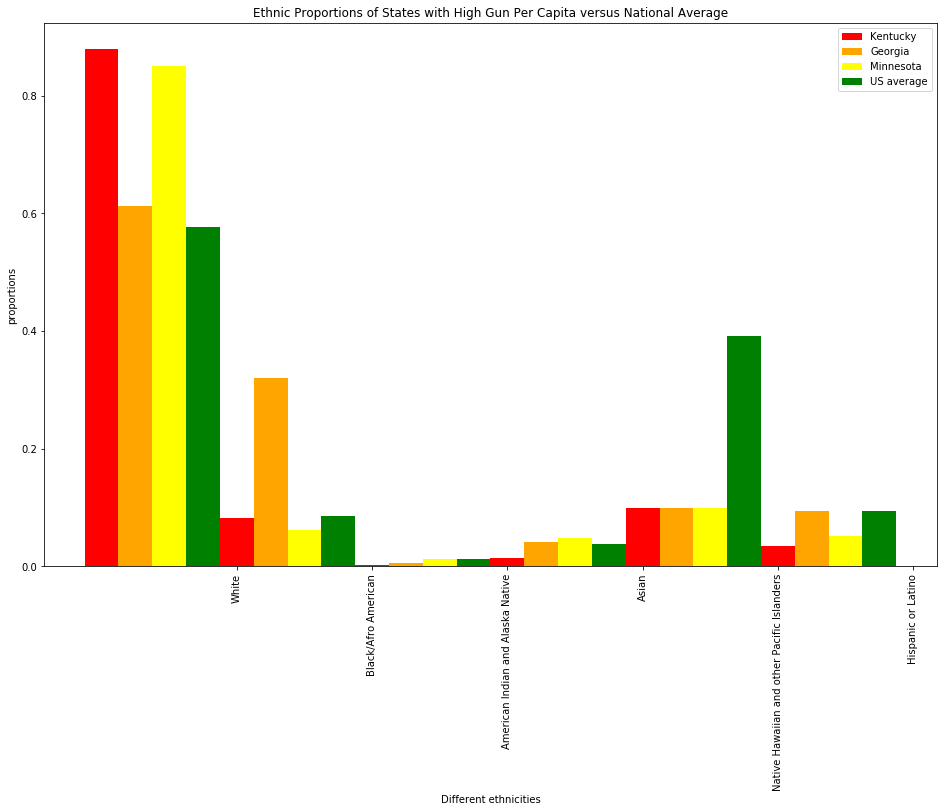

In [321]:
#Let's plot a grouped bar chart to see if anything stands out.
plt.figure(figsize = (16, 10))
x = np.arange(len(kentucky))
bar_width = 0.25
plt.bar(x, kentucky, width = bar_width, color = 'red', label ='Kentucky')
plt.bar(x + bar_width, georgia, width = bar_width, color ='orange', label = 'Georgia')
plt.bar(x + bar_width*2, minnesota, width = bar_width, color = 'yellow', label = 'Minnesota' )
plt.bar(x + bar_width*3, us_avg_ethnic_prop, width = bar_width, color = 'green', label = 'US average')

plt.xticks(x + bar_width*4, ['White', 'Black/Afro American', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and other Pacific Islanders', 'Hispanic or Latino'])
plt.xticks(rotation = 90)
plt.title('Ethnic Proportions of States with High Gun Per Capita versus National Average')
plt.xlabel('Different ethnicities');
plt.ylabel('proportions');
plt.legend();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!